# VRRRROOM Data Analysis

In [1]:
from utils.data_processing import *

import pandas as pd
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import numpy as np


In [2]:
process_var_info = False

if process_var_info:
    pdf_path = "data/CSVColumns.pdf"
    extracted_text = extract_text_from_pdf(pdf_path)
    csv_columns = get_csv_columns_from_pdf(extracted_text)
    df = pd.DataFrame(list(csv_columns.items()), columns=['Field', 'Explanation'])
    df.to_csv("data/csv_columns.csv", index=False)
else:
    df = pd.read_csv("data/csv_columns.csv")

df.head()

,Field,Explanation
0,TrialID,Numerical id of the trial. This is an auto-inc...
1,UserID,A user identifier. It consists of AASG. AA is ...
2,TobiiTimestamp,This is from Tobii's SDK. Internal eye-tracker...
3,Frame,The Unity3D frame during which this data was r...
4,CurrentImageFilename,The name of the image file currently being dis...


In [3]:
data = pd.read_csv("data/41_data.csv")
data.head()

,TrialID,UserID,TobiiTimestamp,Frame,CurrentImageFilename,CurrentAudioFile,ImagePositionx,ImagePositiony,ImagePositionz,ImagePixelSizex,...,ConvergenceDistanceIsValid,LeftPupilDiameter,IsLeftPupilDiameterValid,IsLeftEyeBlinking,RightPupilDiameter,IsRightPupilDiameterValid,IsRightEyeBlinking,DeviceID,DeviceModel,SoftwareVersion
0,41,23ON,28318767213,1093,967de454-d4c2476c-b73d6db8-ec0ea754-a14f4631.jpg,41_967de454-d4c2476c-b73d6db8-ec0ea754-a14f463...,0,1.031092,1,2021,...,True,4.901291,True,False,4.854651,True,False,f55c3e87d9f3ec8d3f3d3211438ed8a0,Pico Pico Neo 2,0.2
1,41,23ON,28318778327,1094,967de454-d4c2476c-b73d6db8-ec0ea754-a14f4631.jpg,41_967de454-d4c2476c-b73d6db8-ec0ea754-a14f463...,0,1.031092,1,2021,...,True,4.893096,True,False,4.843463,True,False,f55c3e87d9f3ec8d3f3d3211438ed8a0,Pico Pico Neo 2,0.2
2,41,23ON,28318789441,1095,967de454-d4c2476c-b73d6db8-ec0ea754-a14f4631.jpg,41_967de454-d4c2476c-b73d6db8-ec0ea754-a14f463...,0,1.031092,1,2021,...,True,4.903635,True,False,4.775081,True,False,f55c3e87d9f3ec8d3f3d3211438ed8a0,Pico Pico Neo 2,0.2
3,41,23ON,28318800555,1096,967de454-d4c2476c-b73d6db8-ec0ea754-a14f4631.jpg,41_967de454-d4c2476c-b73d6db8-ec0ea754-a14f463...,0,1.031092,1,2021,...,True,4.895907,True,False,4.921379,True,False,f55c3e87d9f3ec8d3f3d3211438ed8a0,Pico Pico Neo 2,0.2
4,41,23ON,28318811669,1097,967de454-d4c2476c-b73d6db8-ec0ea754-a14f4631.jpg,41_967de454-d4c2476c-b73d6db8-ec0ea754-a14f463...,0,1.031092,1,2021,...,True,4.950478,True,False,4.851284,True,False,f55c3e87d9f3ec8d3f3d3211438ed8a0,Pico Pico Neo 2,0.2


In [4]:
# pandas show all columns
pd.set_option('display.max_columns', None)
data.describe()

,TrialID,TobiiTimestamp,Frame,ImagePositionx,ImagePositiony,ImagePositionz,ImagePixelSizex,ImagePixelSizey,ImageSizex,ImageSizey,HeadPositionx,HeadPositiony,HeadPositionz,HeadForwardx,HeadForwardy,HeadForwardz,HeadUpx,HeadUpy,HeadUpz,GazeRayHitx,GazeRayHity,GazePixelRadius,GazeRayWorldOriginx,GazeRayWorldOriginy,GazeRayWorldOriginz,GazeRayWorldDirectionx,GazeRayWorldDirectiony,GazeRayWorldDirectionz,GazeType,ConvergenceDistance,LeftPupilDiameter,RightPupilDiameter,SoftwareVersion
count,4448.0,4.448000e+03,4448.000000,4448.0,4.448000e+03,4448.0,4448.000000,4448.000000,4448.000000,4448.0,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4426.000000,4426.000000,4426.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4.448000e+03
mean,41.0,2.834348e+10,3316.500000,0.0,1.031092e+00,1.0,2387.069919,2441.285746,0.988983,1.0,0.012908,1.139073,0.019937,-0.045049,-0.007430,0.986952,0.004800,0.996190,0.009728,0.035055,0.097573,43.098961,0.040197,1.132350,0.013760,-0.020340,0.016318,0.958431,1.112185,6.382331,4.079420,3.987727,2.000000e-01
std,0.0,1.427231e+07,1284.171328,0.0,2.220696e-16,0.0,403.928593,452.772627,0.128567,0.0,0.044132,0.008460,0.033250,0.130578,0.081759,0.010526,0.031183,0.004643,0.080596,0.233630,0.197161,6.712307,0.051107,0.009202,0.033151,0.212909,0.184057,0.039246,0.340313,19.206315,0.281517,0.296917,2.775870e-17
min,41.0,2.831877e+10,1093.000000,0.0,1.031092e+00,1.0,2021.000000,2021.000000,0.832461,1.0,-0.044335,1.116201,-0.033865,-0.256489,-0.211298,0.959431,-0.120712,0.976669,-0.184642,-0.480569,-0.466741,34.000000,-0.066320,1.101159,-0.058652,-0.409291,-0.450622,0.793757,1.000000,-0.001000,2.091039,1.764961,2.000000e-01
25%,41.0,2.833112e+10,2204.750000,0.0,1.031092e+00,1.0,2021.000000,2021.000000,0.832461,1.0,-0.021899,1.133933,-0.006049,-0.126152,-0.056873,0.981384,-0.007697,0.995234,-0.042615,-0.122750,0.010141,37.000000,-0.017777,1.128537,-0.027520,-0.180711,-0.066564,0.936379,1.000000,1.286089,3.907790,3.825472,2.000000e-01
50%,41.0,2.834348e+10,3316.500000,0.0,1.031092e+00,1.0,2544.000000,2544.000000,1.000000,1.0,-0.008922,1.138622,-0.000300,-0.077506,-0.017358,0.991378,0.012286,0.998075,0.017415,0.042057,0.118073,43.000000,0.060212,1.134648,0.029123,-0.049977,0.047481,0.976242,1.000000,1.761293,4.066406,3.985576,2.000000e-01
75%,41.0,2.835584e+10,4428.250000,0.0,1.031092e+00,1.0,2544.000000,3056.000000,1.000000,1.0,0.058357,1.142166,0.057109,0.087688,0.049801,0.994473,0.019200,0.998879,0.058369,0.218659,0.234758,51.000000,0.083260,1.137128,0.041593,0.146191,0.143439,0.986693,1.000000,2.636966,4.286529,4.162355,2.000000e-01
max,41.0,2.836819e+10,5540.000000,0.0,1.031092e+00,1.0,3056.000000,3056.000000,1.201258,1.0,0.095673,1.162492,0.078052,0.237336,0.190465,0.999905,0.064482,0.999979,0.214730,0.619672,0.476323,56.000000,0.133107,1.156243,0.059828,0.457065,0.329913,0.999493,3.000000,100.000000,4.963204,5.080589,2.000000e-01


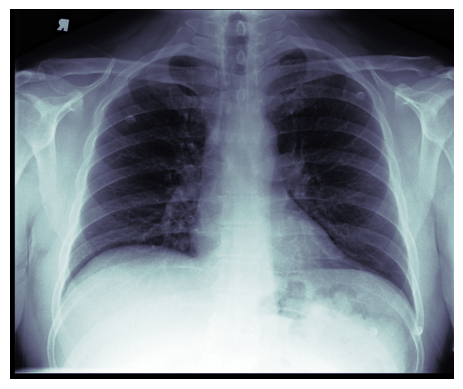

In [7]:
IMG_INDX = 1
img_filename = data['CurrentImageFilename'].unique()[IMG_INDX]

img = load_image(img_filename)


In [8]:
def load_gaze_on_image(img, filtered_data, columns, scale_factor=1):

    height, width = img.shape

    gaze_ray_hitx = filtered_data[columns[0]]
    gaze_ray_hity = filtered_data[columns[1]]

    # gaze_ray_hitx is from -0.5 to 0.5, so we need to scale it to the image size
    gaze_ray_hitx_scaled = (gaze_ray_hitx + scale_factor) * width
    gaze_ray_hity_scaled = (1 - gaze_ray_hity - scale_factor) * height

    plt.figure(figsize=(8, 10))
    plt.imshow(img, cmap='bone', extent=[0, img.shape[1], 0, img.shape[0]])

    plt.scatter(gaze_ray_hitx_scaled, gaze_ray_hity_scaled, color='red', s=10, label='Eye Gaze')

    plt.title('Eye Gaze Coordinates Over X-ray Image')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(False)
    plt.axis('off')
    plt.legend()
    plt.show()
    


X min -0.3078109
X max 0.6196719
Y min -0.4667415
Y max 0.4439393


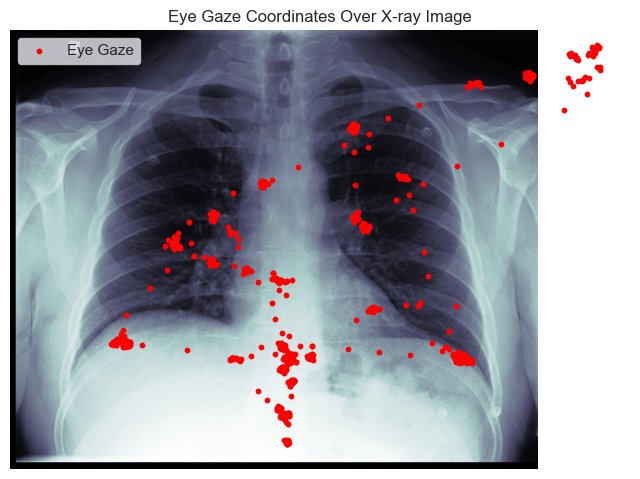

In [9]:

filtered_data = data[data['CurrentImageFilename'] == img_filename]

print("X min", filtered_data['GazeRayHitx'].min() )
print("X max", filtered_data['GazeRayHitx'].max() )
print("Y min", filtered_data['GazeRayHity'].min() )
print("Y max", filtered_data['GazeRayHity'].max() )

load_gaze_on_image(img, filtered_data, ['GazeRayHitx', 'GazeRayHity'], scale_factor=0.5)
